In [19]:
import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import scipy.constants
import scipy.io

def set_font(fontsize=18, font="Times New Roman"):
    rc = {"font.size" : fontsize,
    "font.family" : font,
    "mathtext.fontset" : "stix"}
    plt.rcParams.update(rc)
set_font()

C = scipy.constants.c
mm = 1E-3

dipole109 = rf.Network('../../../Data/Dipole_Calibration_221207/Dipole2Dipole109mm_221207.s2p')
dipole188 = rf.Network('../../../Data/Dipole_Calibration_221207/Dipole2Dipole188mm_221207.s2p')
dipole286 = rf.Network('../../../Data/Dipole_Calibration_221207/Dipole2Dipole286mm_221207.s2p')
dipole383 = rf.Network('../../../Data/Dipole_Calibration_221207/Dipole2Dipole383mm_221207.s2p')

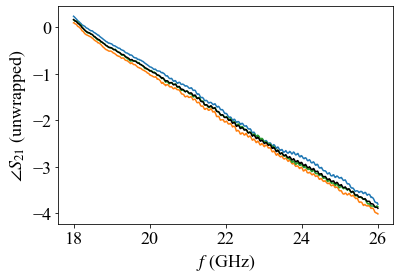

In [21]:
f = dipole109.f
lam = C/f
k = 2*np.pi/lam

def extract_phase(network, L, k):
    phase = network.s21.s[:,0,0]/np.exp(-1j*k*L)
    return np.unwrap(np.angle(phase))/2

angle_cal109 = extract_phase(dipole109, 109*mm, k)
angle_cal188 = extract_phase(dipole188, 188*mm, k)
angle_cal286 = extract_phase(dipole286, 286*mm, k)
angle_cal383 = extract_phase(dipole383, 383*mm, k)
# horn_phase = np.mean(np.stack((angle_cal109, angle_cal188, angle_cal286, angle_cal383), axis=1), axis=1)
dipole_phase = np.mean(np.stack((angle_cal188, angle_cal286, angle_cal383), axis=1), axis=1)

fig = plt.figure()
# plt.plot(f*1E-9, angle_cal109)
plt.plot(f*1E-9, angle_cal188)
plt.plot(f*1E-9, angle_cal286)
plt.plot(f*1E-9, angle_cal383)
plt.plot(f*1E-9, dipole_phase, color='black')
plt.xlabel('$f$ (GHz)')
plt.ylabel(r'$\angle S_{21}$ (unwrapped)')
plt.show()


### Export

In [18]:
scipy.io.savemat('../../../Data/Dipole_Calibration_221207/dipole_phase.mat', {'dipole_phase': dipole_phase,
                                                                              'f': f})